# PHT Eclipsing Binary Catalog

- data covered: sectors 1 - 39 (2 years of Southern hemisphere and 1 year of Northern hemisphere)

In [1]:
from importlib import reload

from IPython.display import display, HTML, clear_output

import pandas as pd
from pandas.io.clipboard import clipboard_set

import catalog_stats
import dashboard_utils
from dashboard_utils import CAT_COLS_COMMON
from dashboard_utils import two_columns

display(HTML("<style>.container { width:99% !important; }</style>"))

## Tagging accuracy and Catalog coverage

GridBox(children=(Output(layout=Layout(border='1px dotted gray')), Output(layout=Layout(border='1px dotted gra…

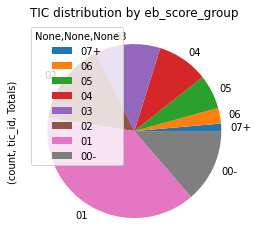

In [2]:
# reload(catalog_stats)

df_catalog = dashboard_utils.get_catalog("pht_eb")

grid, col1, col2 = two_columns(also_return_outputs=True)

with col1:
    report, styler = catalog_stats.pivot_by_eb_score_group(df_catalog, also_return_styler=True)
    display(styler)

with col2:
    ax = report[report.index != "Totals"].plot.pie(y=('count', 'tic_id', 'Totals'));
    ax.set_title("TIC distribution by eb_score_group")
    display(ax.get_figure())

display(grid);

## Coverage of individual catalogs

In [3]:
report_simbad, styler_simbad = catalog_stats.pivot_by_eb_score_group(df_catalog, columns="SIMBAD_Is_EB", also_return_styler=True)
# display(report_simbad[report_simbad.index == "Totals"])
display(two_columns(styler_simbad, styler))

report_vsx, styler_vsx = catalog_stats.pivot_by_eb_score_group(df_catalog, columns="VSX_Is_EB", also_return_styler=True)
# display(report_vsx[report_vsx.index == "Totals"])
display(two_columns(styler_vsx, styler))

report_asas_sn, styler_asas_sn = catalog_stats.pivot_by_eb_score_group(df_catalog, columns="ASASSN_Is_EB", also_return_styler=True)
# display(report_vsx[report_asas_sn.index == "Totals"])
display(two_columns(styler_asas_sn, styler))

GridBox(children=(Output(layout=Layout(border='1px dotted gray')), Output(layout=Layout(border='1px dotted gra…

GridBox(children=(Output(layout=Layout(border='1px dotted gray')), Output(layout=Layout(border='1px dotted gra…

GridBox(children=(Output(layout=Layout(border='1px dotted gray')), Output(layout=Layout(border='1px dotted gra…

### Compare raw number of EB votes vs adjusted eb_score 
- can we just use raw `num_votes_eb`, rather than adjusted `eb_score`, to gauge the likelihood of TIC being an eclipsing binary?

In [4]:
report_by_score, styler_by_score = catalog_stats.pivot_by_eb_score_group(df_catalog, row="num_votes_eb_group", also_return_styler=True)
display(two_columns(styler_by_score, styler))

GridBox(children=(Output(layout=Layout(border='1px dotted gray')), Output(layout=Layout(border='1px dotted gra…

## Sample TICs

In [16]:
reload(dashboard_utils)

df = df_catalog
df = (
    df
    [df["is_eb_catalog"] == "F"]
    .groupby("eb_score_group")
    .head(2)
    .sort_values(["eb_score_group"], ascending=[False])
    )
# clipboard_set(df[CAT_COLS_COMMON].to_markdown())
# df[CAT_COLS_COMMON].to_clipboard()

# dashboard_utils.style(df[CAT_COLS_COMMON])
dashboard_utils.style(df[["best_subject_img_id", ] + CAT_COLS_COMMON], show_thumbnail=True)

best_subject_img_id,tic_id,best_subject_id,is_eb_catalog,eb_score,SIMBAD_MAIN_ID,SIMBAD_OTYPES,SIMBAD_Is_EB,VSX_OID,VSX_Type,VSX_Is_EB,VSX_Period,ASASSN_Name,ASASSN_URL,ASASSN_Type,ASASSN_Per
,143669444,32026607,F,11,HD 64881,,-,409787,ACV|ELL,F,1.103900,J075359.20-453838.0,details,VAR,274.2499665
,198537349,44563986,F,7,HD 141988,,-,58848,nan,-,nan,J154830.03+622040.8,details,ROT:,NON PERIODIC
,4200337,56365918,F,6,nan,nan,-,371037,BY,F,8.164117,J052244.88-010231.9,details,ROT,8.152767
,77209028,30249806,F,6,CD-38 1652,Ro*|X|V*,F,280953,ROT,F,0.568900,J043558.78-384134.0,details,VAR,NON PERIODIC
,17342647,48229829,F,5,HD 144359,UV,-,1546101,HB,F,4.382000,nan,nan,nan,nan
,29854488,52580003,F,5,nan,nan,-,,nan,-,nan,J013616.50-105235.0,details,ROT,2.3008603
,22120766,41413067,F,4,CD-23 8836,Ro*|X|V*,F,90404,ROT,F,1.668000,J095357.05-240846.9,details,ROT:,NON PERIODIC
,22221233,41410027,F,4,TYC 6604-717-1,,-,,nan,-,nan,J095556.28-240307.8,details,ROT:,NON PERIODIC
,52357,64613852,F,3,HD 129195,V*,-,58594,VAR,-,0.377800,J144157.16-280357.6,details,L,NON PERIODIC
,8669966,48223652,F,3,* 32 Her,**|SB*|UV,-,59130,ELL+DSCT,F,3.394306,J163329.10+302956.2,details,ROT:,NON PERIODIC


GridBox(children=(Output(layout=Layout(border='1px dotted gray')), Output(layout=Layout(border='1px dotted gra…

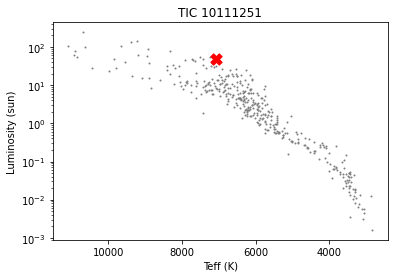

In [6]:
dashboard_utils.display_details(
    tic_id=10111251, 
    type="tic_meta",
    brief=True,
)